<a href="https://colab.research.google.com/github/jabir-al-nahian/bangla-fake-news-detection/blob/main/Bangla_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import metrics
from scipy import stats
import statsmodels.api as sm
import math
import re
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sys
import pandas.core.algorithms as algos
pd.pandas.set_option('display.max_columns',None)

In [ ]:
import pandas as pd
news_data = pd.read_csv("/content/Dataset.csv",encoding='unicode_escape')

In [ ]:
news_data

,Title,Statement,Category,Source,Date,Class
0,"?? ???? ?????? ?????? ?? ????, ???? ?????? ???",\n\n???? ???????????? ???????? ??? ?? ?? ?????...,???????? ?????,https://www.prothomalo.com/bangladesh/article/...,"\n?? ?????? ????, ??:??\n\n\t\t\t\t\t\t\t?????...",Real
1,?????-??-?? ???? ???????? ???? ??? ????,\n\n??????? ???????????? ?? ???? ??????? ?????...,???? ??? ?????,https://www.prothomalo.com/bangladesh/article/...,"\n?? ?????? ????, ??:??\n\n\t\t\t\t\t\t\t?????...",Real
2,?????????? ???????!,"\n\n????? ????? ?????????? ?????, ????? ???? ?...",???? ??? ?????,https://www.prothomalo.com/bangladesh/article/...,"\n?? ?????? ????, ??:??\n\n\t\t\t\t\t\t\t?????...",Real
3,?? ?????????????,\n\n????? ???????? ?? ??? ??????? ???? ??? ???...,???? ??? ?????,https://www.prothomalo.com/bangladesh/article/...,"\n?? ?????? ????, ??:??\n\n\t\t\t\t\t\t\t?????...",Real
4,?? ????? ??????? ???????,\n\n???? ??? ???????? ??? ???????? ??????? ?? ...,???? ??? ?????,https://www.prothomalo.com/bangladesh/article/...,"\n?? ?????? ????, ??:??\n\n\t\t\t\t\t\t\t?????...",Real
...,...,...,...,...,...,...
2536,\n??? ????? ?????? ????? ?????????? ???? ?????...,\n\n\n\n\n\n\n \n\n???? ?????????? ???? ??? ??...,??????,https://prothom1alu.blogspot.com/,"????????, ?? ??, ????",Fake
2537,\n??? ????? ????? ???? ????? ???? ??????\n,\n\n\n \n\n?????? ??????? ??? ???? ???????? ??...,???????,https://prothom1alu.blogspot.com/,"????????, ?? ??, ????",Fake
2538,\n????????? ???? ???? ?? ???? ???\n,\n\n\n\n\n???? ????????? ???? ????? ???? ?? ??...,?????,https://prothom1alu.blogspot.com/,"????????, ?? ??, ????",Fake
2539,\n????? ???? ?? ??????? ????????? ???????? ???...,\n\n\n\n\n\n\n\n???? ????????? ???? ?????? ???...,?????,https://prothom1alu.blogspot.com/,"??????, ? ??, ????",Fake


In [ ]:
news_data.shape

(2541, 6)

In [ ]:
news_data.isnull().sum()

Title        0
Statement    0
Category     0
Source       0
Date         0
Class        0
dtype: int64

In [ ]:
news_data = news_data.fillna('')

In [ ]:
news_data.isnull().sum()

Title        0
Statement    0
Category     0
Source       0
Date         0
Class        0
dtype: int64

In [ ]:
news_data['content'] = news_data['Title']+news_data['Statement']+news_data['Category']+news_data['Source']+	news_data['Date']

In [ ]:
print(news_data['content'])

0       ?? ???? ?????? ?????? ?? ????, ???? ?????? ???...
1       ?????-??-?? ???? ???????? ???? ??? ????\n\n???...
2       ?????????? ???????!\n\n????? ????? ?????????? ...
3       ?? ?????????????\n\n????? ???????? ?? ??? ????...
4       ?? ????? ??????? ???????\n\n???? ??? ???????? ...
                              ...                        
2536    \n??? ????? ?????? ????? ?????????? ???? ?????...
2537    \n??? ????? ????? ???? ????? ???? ??????\n\n\n...
2538    \n????????? ???? ???? ?? ???? ???\n\n\n\n\n\n?...
2539    \n????? ???? ?? ??????? ????????? ???????? ???...
2540    \n????????? ??? ?????? ??????? ????? ???????? ...
Name: content, Length: 2541, dtype: object


In [ ]:
# separating the data & label

## Get the Independent Features
X = news_data.drop(columns='Class', axis=1)
## Get the Dependent features
Y = news_data['Class']

In [ ]:
Y.value_counts()

Real    1548
Fake     993
Name: Class, dtype: int64

In [ ]:
X.shape

(2541, 6)

In [ ]:
Y.shape

(2541,)

In [ ]:
print(X)
print(Y)

                                                  Title  \
0        ?? ???? ?????? ?????? ?? ????, ???? ?????? ???   
1               ?????-??-?? ???? ???????? ???? ??? ????   
2                                   ?????????? ???????!   
3                                      ?? ?????????????   
4                              ?? ????? ??????? ???????   
...                                                 ...   
2536  \n??? ????? ?????? ????? ?????????? ???? ?????...   
2537         \n??? ????? ????? ???? ????? ???? ??????\n   
2538                \n????????? ???? ???? ?? ???? ???\n   
2539  \n????? ???? ?? ??????? ????????? ???????? ???...   
2540  \n????????? ??? ?????? ??????? ????? ???????? ...   

                                              Statement        Category  \
0     \n\n???? ???????????? ???????? ??? ?? ?? ?????...  ???????? ?????   
1     \n\n??????? ???????????? ?? ???? ??????? ?????...  ???? ??? ?????   
2     \n\n????? ????? ?????????? ?????, ????? ???? ?...  ???? ??? 

In [ ]:
#separating the data and label
X = news_data['content'].values
Y = news_data['Class'].values

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

# **Logistic**

In [ ]:
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  1.0


accuracy:   1.000
Confusion matrix, without normalization


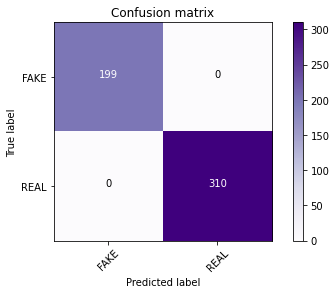

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

model.fit(X_train, Y_train)
prediction = model.predict(X_test)
score = metrics.accuracy_score(Y_test, prediction)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y_test, prediction)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00       199
        Real       1.00      1.00      1.00       310

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



# Multinomial Naive **Bayes**

In [ ]:
#let's implement the model : Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

accuracy:   0.998
Confusion matrix, without normalization


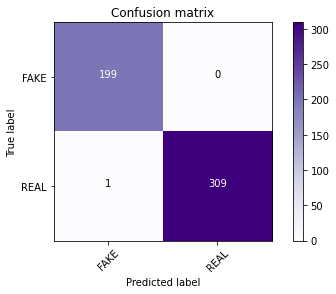

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, Y_train)
prediction1 = classifier.predict(X_test)
score = metrics.accuracy_score(Y_test, prediction1)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y_test, prediction1)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

In [ ]:
X_new = X_test[0]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

['Fake']
The news is Fake


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction1))

              precision    recall  f1-score   support

        Fake       0.99      1.00      1.00       199
        Real       1.00      1.00      1.00       310

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



## **RF**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,Y_train)

RandomForestClassifier()

accuracy:   1.000
Confusion matrix, without normalization


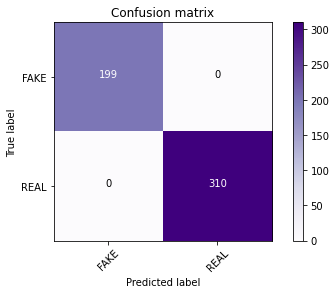

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

rfmodel.fit(X_train, Y_train)
prediction2 = rfmodel.predict(X_test)
score = metrics.accuracy_score(Y_test, prediction2)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y_test, prediction2)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction2))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00       199
        Real       1.00      1.00      1.00       310

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509



# **SVM**

In [ ]:
from sklearn.svm import SVC
smodel = SVC()
smodel.fit(X_train,Y_train)

SVC()

accuracy:   1.000
Confusion matrix, without normalization


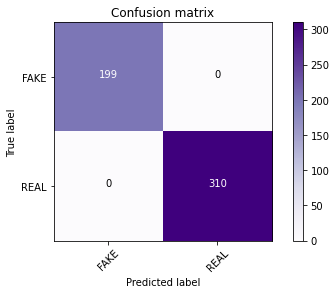

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

smodel.fit(X_train, Y_train)
prediction3 = rfmodel.predict(X_test)
score = metrics.accuracy_score(Y_test, prediction3)
print("accuracy:   %0.3f" % score)
cm1 = metrics.confusion_matrix(Y_test, prediction3)
plot_confusion_matrix(cm1, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction2))

              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00       199
        Real       1.00      1.00      1.00       310

    accuracy                           1.00       509
   macro avg       1.00      1.00      1.00       509
weighted avg       1.00      1.00      1.00       509

